# Analiza podatkov o gorskih kolesih


Ta zvezek vsebuje analizo podatkov o prodaji rabljenih gorskih koles s spletne strani bajk.si.
Analizirali bomo:
* Povprečne cene in deleži po kategorijah koles
* Cenovni razredi in vplivi na ceno
* Povezavo med dolžino opisa in številom ogledov



In [284]:
import pandas as pd
pd.options.display.max_rows = 20

In [285]:
vsi_podatki = pd.read_csv("tabele/bike_podatki.csv")
cene = vsi_podatki["cena"]
prave_cene = []
for c in cene:
    c = c[:-2]
    if "." in c:
        c = c.split(".")
        c = c[0] + c[1]
    try:
        c = int(c)
    except ValueError:
        c = None
    prave_cene.append(c)
vsi_podatki["prava_cena"] = prave_cene
vsi_podatki

,naslov,cena,starost,proizvajalec,letnik,velikost okvirja,material,velikost obročev,dolžina opisa,kategorija,posodobljeno,ogledi,prava_cena
0,Capra Core 2 2023,1.800 €,Rabljeno,YT,2023,L,Aluminij,29 col,407,Enduro kolesa,09.10.2025,47,1800.0
1,COMMENCAL CLASH RIDE 2021 LARGE,2.300 €,Rabljeno,Commencal,2021,L,Aluminij,27.5 col (650b),1240,Enduro kolesa,26.09.2025,242,2300.0
2,specialized status,1.200 €,Rabljeno,Specialized,2020,L,Aluminij,Mullet (29 in 27.5),462,Enduro kolesa,28.09.2025,276,1200.0
3,Bergamont roxter 8.0,550 €,Rabljeno,Bergamont,2020,S,Aluminij,27.5 col (650b),97,Prednje vzmetena / XC kolesa,06.09.2025,129,550.0
4,Lapierre Spicy 7.9,2.300 €,Rabljeno,Lapierre,2020,M,Karbon,29 col,650,Enduro kolesa,16.09.2025,62,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,specialized enduro 2019 29’,800 €,Rabljeno,Specialized,2019,L,Aluminij,29 col,909,Enduro kolesa,21.07.2025,905,800.0
884,Trek slash 7,1.750 €,Rabljeno,Trek,2022,M,Aluminij,29 col,119,Enduro kolesa,07.10.2025,399,1750.0
885,Giant Trance X 1 2021 M size,1.400 €,Rabljeno,Giant,2021,M,Aluminij,29 col,75,Gorska kolesa,21.07.2025,290,1400.0
886,Pivot Firebird,1.850 €,Rabljeno,Pivot,2018,L,Karbon,27.5 col (650b),343,Trail in All-Mountain kolesa,26.09.2025,65,1850.0


## Povprečna cena po kategorijah koles

Pogledali bomo koliko je povprečna cena, po kategorijah ki so na spletni strani, kolikšna je vrednost vsote posamezne kategorije, glede na celo ponudbo. Podobno bomo naredili za material, velikost okvirja, znamke

Text(0, 0.5, 'Cena [€]')

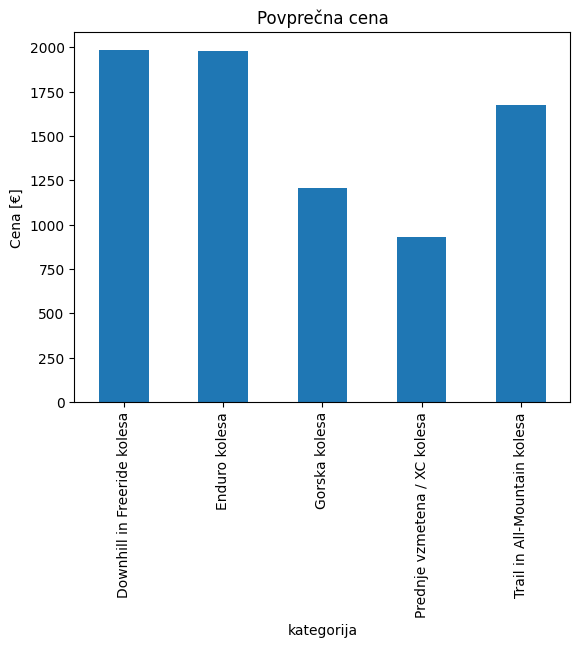

In [286]:
kolesa_po_kategorijah = vsi_podatki.groupby("kategorija")

povprecje_kategorije = kolesa_po_kategorijah.prava_cena.mean().round(2)

ax = povprecje_kategorije.plot(kind="bar",  title="Povprečna cena").set_ylabel("Cena [€]")  
ax

Kolikšen procent trga predstavlja vsaka kategorija

Text(0.5, 1.0, 'procent trga')

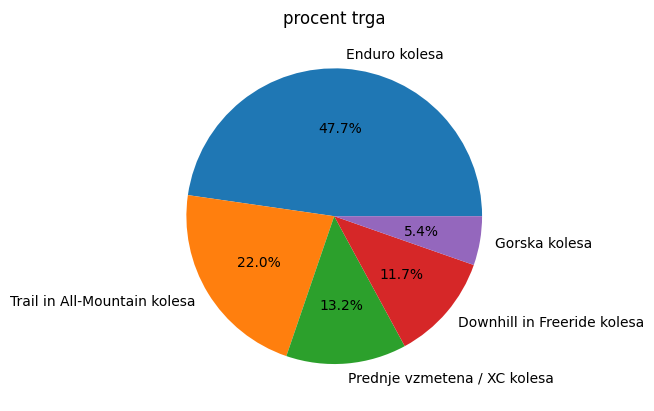

In [287]:
vsi_podatki_kategorije = kolesa_po_kategorijah.prava_cena.sum().sort_values(ascending=False)
ax = vsi_podatki_kategorije.plot(kind="pie", autopct='%.1f%%') 
ax.set_ylabel("")
ax.set_title("procent trga")

Povprečna cena po materialu:

Text(0, 0.5, 'Cena [€]')

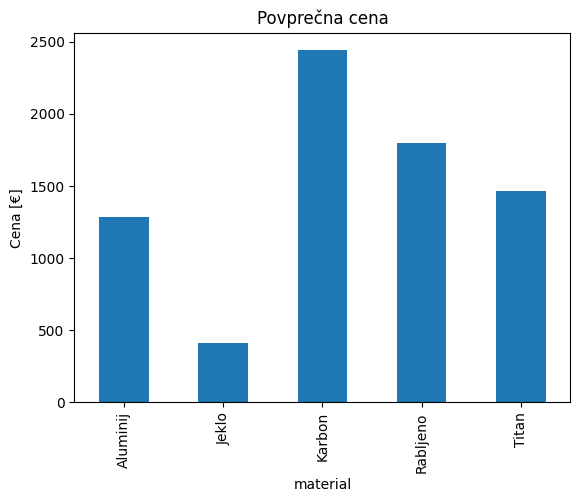

In [288]:
kolesa_po_materialu = vsi_podatki.groupby("material")
povprecje_po_materialu = kolesa_po_materialu.prava_cena.mean().round(2)
ax = povprecje_po_materialu.plot(kind="bar",  title="Povprečna cena").set_ylabel("Cena [€]")  
ax

Procent trga po materialu:

Text(0.5, 1.0, 'procent trga')

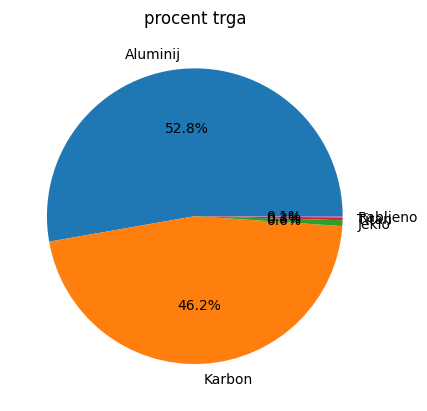

In [289]:
vsota_po_kategoriji = kolesa_po_materialu.prava_cena.sum().sort_values(ascending=False)
ax = vsota_po_kategoriji.plot(kind="pie", autopct='%.1f%%') 
ax.set_ylabel("")
ax.set_title("procent trga")

Povprečna cena po velikosti:

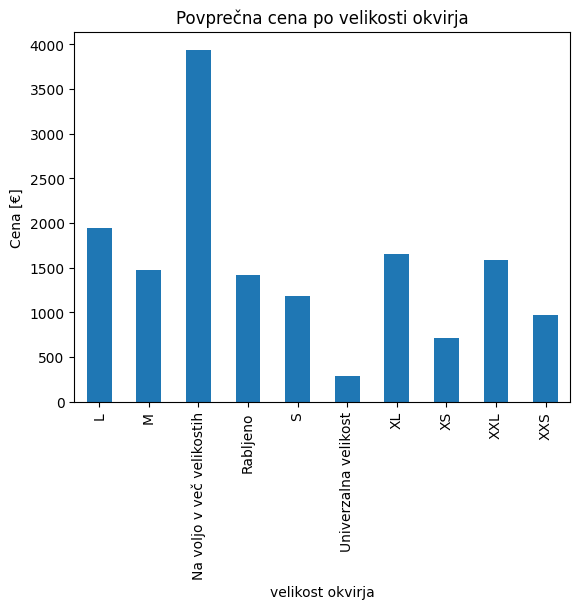

In [290]:
kolesa_po_velikosti = vsi_podatki.groupby("velikost okvirja")
povprecje_po_velikosti = kolesa_po_velikosti.prava_cena.mean().round(2)
ax = povprecje_po_velikosti.plot(kind="bar",  title="Povprečna cena po velikosti okvirja").set_ylabel("Cena [€]")  


Procent trga po velikosti:

Text(0.5, 1.0, 'procent trga')

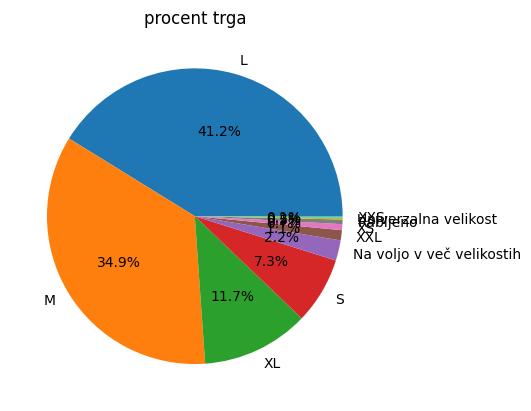

In [291]:
vsota_po_kategoriji = kolesa_po_velikosti.prava_cena.sum().sort_values(ascending=False)
ax = vsota_po_kategoriji.plot(kind="pie", autopct='%.1f%%') 
ax.set_ylabel("")
ax.set_title("procent trga")

Povprečna cena po proizvajalcih:

Text(0.5, 1.0, 'Povprečna cena znamke')

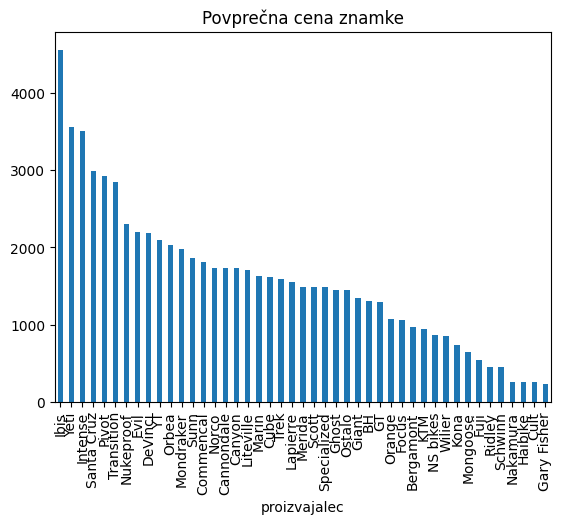

In [292]:
kolesa_po_proizvajalcih = vsi_podatki.groupby("proizvajalec")
povprecje_po_proizvajalcih = kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False)
ax = povprecje_po_proizvajalcih.plot(kind="bar") 

ax.set_title("Povprečna cena znamke")

Da se bo bolje videlo dajmo v graf prvih 10 in zadnjih 10

Text(0.5, 1.0, 'Povprečna cena znamke')

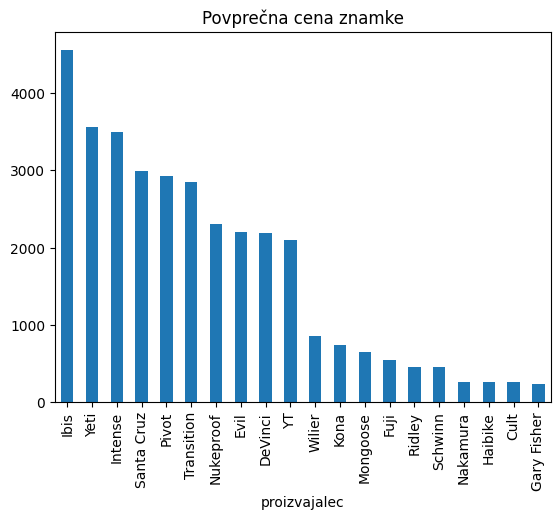

In [293]:
kolesa_po_proizvajalcih = vsi_podatki.groupby("proizvajalec")
kolesa_po_proizvajalcih =pd.concat([ kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False).head(10),kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False).tail(10)])
ax = kolesa_po_proizvajalcih.plot(kind="bar") 

ax.set_title("Povprečna cena znamke")

Procent trga po proizvajalcih

In [294]:
vsota_po_kategoriji = kolesa_po_proizvajalcih.prava_cena.sum().sort_values(ascending=False)
ax = vsota_po_kategoriji.plot(kind="pie", autopct='%.1f%%') 
ax.set_ylabel("")
ax.set_title("procent trga")

AttributeError: 'Series' object has no attribute 'prava_cena'

## Cenovni razredi
Koliko koles je v katerem cenovnem razredu (po 500)

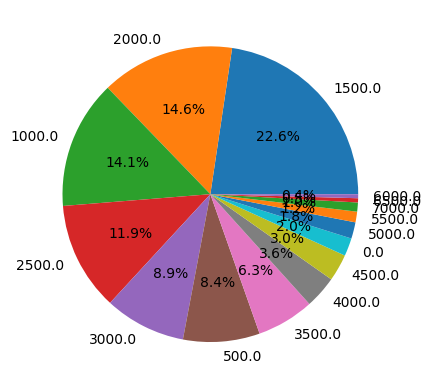

In [ ]:
vsi_podatki["cenovni_razred"] = (vsi_podatki["prava_cena"]//500)*500
kolesa_po_razredih = vsi_podatki.groupby("cenovni_razred")
kolicina = kolesa_po_razredih.size()
vsota_po_kategoriji = kolesa_po_razredih.prava_cena.sum().sort_values(ascending=False)
ax = vsota_po_kategoriji.plot(kind="pie", autopct='%.1f%%').set_ylabel("") 


Koliko je cena koles glede na starost kolesa, kako hitro izgubljajo vrednost

<Axes: xlabel='starost_kolesa'>

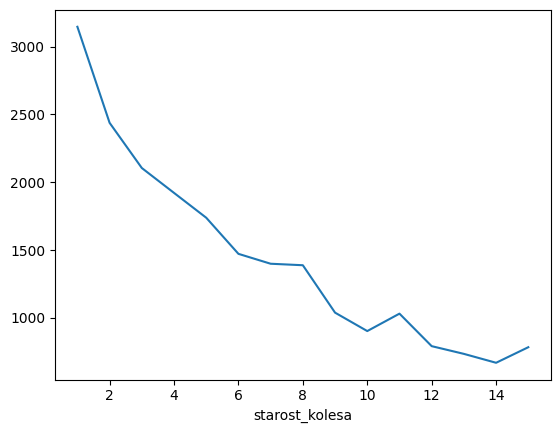

In [ ]:
vsi_podatki['letnik'] = pd.to_numeric(vsi_podatki['letnik'], errors='coerce')
vsi_podatki['starost_kolesa'] = 2026 - vsi_podatki['letnik']

cena_po_starosti = vsi_podatki.groupby('starost_kolesa')['prava_cena'].mean()
cena_po_starosti.plot(kind="line")

Za koliko odstotkov lanske vrednosti povprečju pade cena vsako leto?

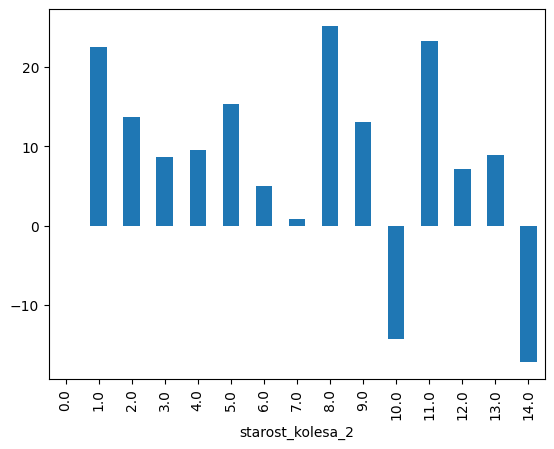

In [ ]:
vsi_podatki['starost_kolesa_2'] = 2025 - vsi_podatki['letnik']

cena_po_starosti_2 = vsi_podatki.groupby('starost_kolesa_2')['prava_cena'].mean()
cena_po_starosti_3 = cena_po_starosti.copy()
prva_vrednost = pd.Series([cena_po_starosti_3.iloc[0]], index=[0])  # indeks 0 namesto originalnega
ostale_vrednosti = cena_po_starosti_3.iloc[:-1]  # vse razen zadnje

cena_po_starosti_3 = pd.concat([prva_vrednost, ostale_vrednosti]).sort_index()
ax = ((1- cena_po_starosti_2/cena_po_starosti_3)*100).plot(kind="bar")


Kolikšen odstotek "prvotne vrednosti" ima kolo vsako leto s starostjo? 

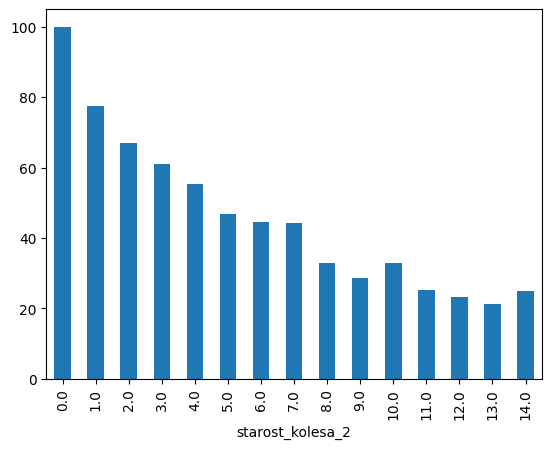

In [ ]:
ax = (( cena_po_starosti_2/cena_po_starosti_3[0])*100).plot(kind="bar")


## Kaj vpliva na oglede
Kakšna je pa dolžina opisa, glede na cenovni razred? So opisi daljši za dražja kolesa?

<Axes: xlabel='cenovni_razred'>

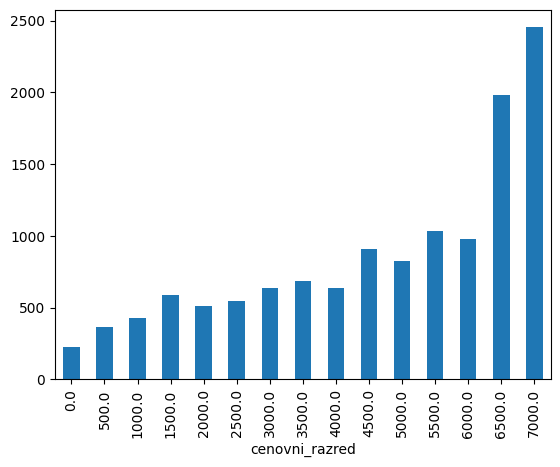

In [ ]:
opis_po_razredih = kolesa_po_razredih["dolžina opisa"].mean()
opis_po_razredih.plot(kind="bar")

Kaže da so res opisi daljši za dražja kolesa.

Število ogledov povezano s ceno (ker so dragi zanimivi) ali z dolžino opisa?

<Axes: xlabel='cenovni_razred'>

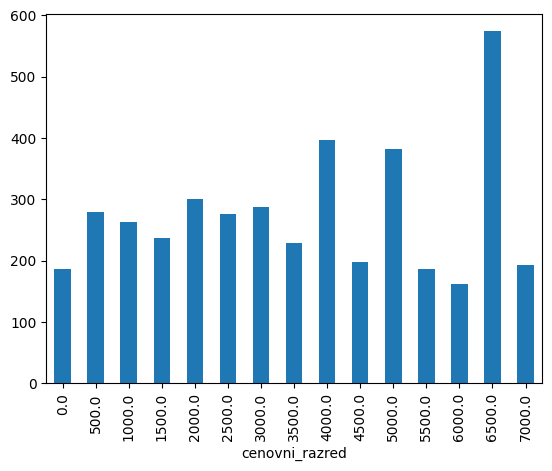

In [ ]:
ogledi_po_razredih = kolesa_po_razredih.ogledi.mean()
ogledi_po_razredih.plot(kind="bar")

Poglejmo skupen graf ogledov in dolžine opisa, kako (če sploh) vpliva dolžina opisa na število ogledov. Predvidevam, da daljši opis prinese več ogledov. 

<Axes: xlabel='cenovni_razred'>

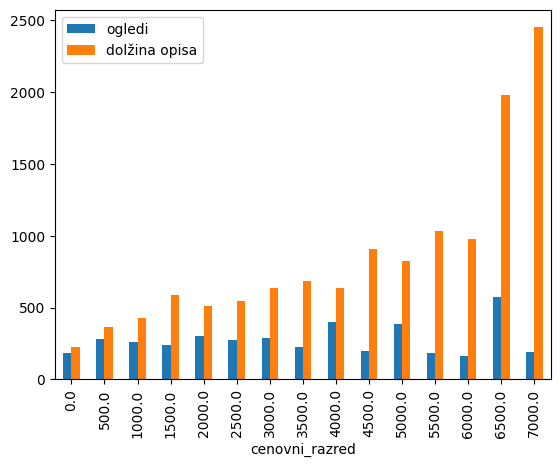

In [ ]:
ogledi_in_opis_po_razredih = pd.merge( ogledi_po_razredih, opis_po_razredih, on="cenovni_razred").round(0)

ogledi_in_opis_po_razredih.plot(kind="bar")

zgleda da ni prave koleracije med številom ogledov in dolžino opisa. So pa oglasi različno stari, imamo samo podatek zadne posodobitve (ki je lahko prva lahko pa ne) dodajmo "indeks starosti-ogledov", ki ga definirajmo kot ogledi/starost

<Axes: title={'center': 'Indeksi po cenovnih razredih (opis deljen s 100)'}, xlabel='Cenovni razred', ylabel='Vrednosti'>

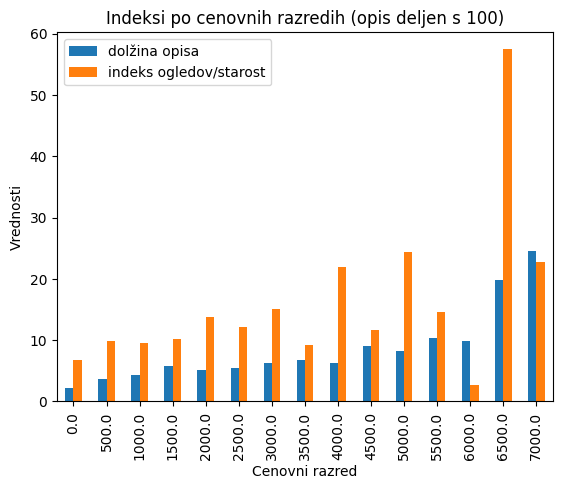

In [ ]:
vsi_podatki['posodobljeno'] = pd.to_datetime(vsi_podatki['posodobljeno'], format='%d.%m.%Y')
referencni_datum = pd.to_datetime('20.10.2025', format='%d.%m.%Y')
vsi_podatki["starost"] = (referencni_datum - vsi_podatki["posodobljeno"]).dt.days
#vsi_podatki[["posodobljeno","starost"]]
vsi_podatki["indeks ogledov/starost"] = vsi_podatki["ogledi"] / vsi_podatki["starost"]
#vsi_podatki["indeks ogledov/starost"]
indeks_po_razredih = vsi_podatki.groupby("cenovni_razred")["indeks ogledov/starost"].mean().sort_values(ascending=False)

ax = pd.merge(opis_po_razredih/100,indeks_po_razredih, on="cenovni_razred").round(1).plot(kind="bar")

ax.set_title('Indeksi po cenovnih razredih (opis deljen s 100)')
ax.set_xlabel('Cenovni razred')
ax.set_ylabel('Vrednosti')
ax

Tukaj vidimo, da indeks rahlo pada z dolžino opisa, je pa tudi za upoštevati, da oglasi ki so imeli ceno posodobljeno, je cena nižja kot prejšnja,to pomeni, da je zato pri manjših vrednostih indeks ogledov/starost večji.

Kdaj so bili oglasi posodobljeni, po mesecih?

Text(0.5, 1.0, 'Stevilo posodobitev na mesec')

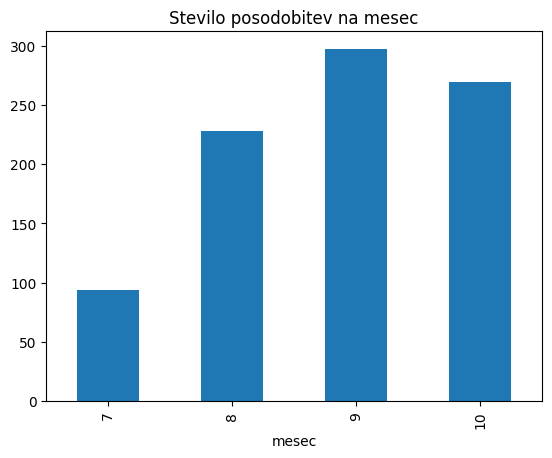

In [ ]:

vsi_podatki['mesec'] = vsi_podatki['posodobljeno'].dt.month
stevilo_posodobitev = vsi_podatki.groupby('mesec').size()
stevilo_posodobitev.plot(kind="bar").set_title("Stevilo posodobitev na mesec")

Izgleda kot da so vsi oglasi bili posodobljeni letos, ali pa jih res posodabljajo le jeseni, preverimo. Vseeno se pa vidi da je več posodobitev jeseni, je pa res da če je bil oglas posodobljen in julija in oktobra, potem je v tabeli le oktober.

<Axes: xlabel='leto'>

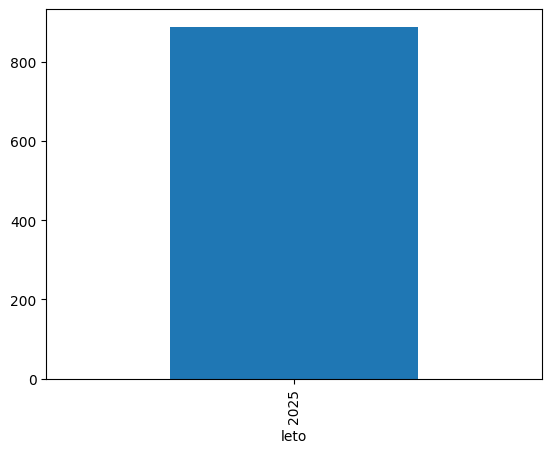

In [ ]:
vsi_podatki['leto'] = vsi_podatki['posodobljeno'].dt.year
posodobitve_letno= vsi_podatki.groupby('leto').size()
posodobitve_letno.plot(kind="bar")

## Zaključek
Žal nimam podatkov o prvem nalaganju oglasov in spreminjanja cen skozi čas, da bi tudi videl koliko časa se katera kolesa prodajajo in koliko jim je že padla cena, ker to bi res popestrilo analizo. Lahko bi tudi analiziral kvaliteto/lepoto slik podanih zraven oglasa in morda dobil boljšo povetavo s količino ogledov, to bi lahko storil s kakšnim ai modelom, ki pa bi lahko slabo ocenil "vrednost" slike. Podobno za kvaliteto opisa. 